# Example notebook

## Example 01

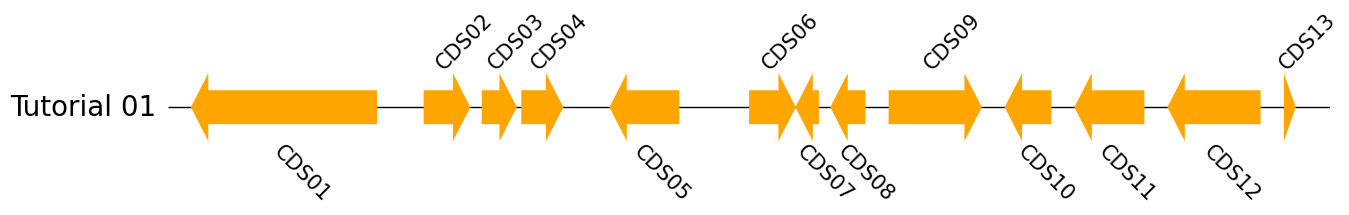

In [1]:
from pygenomeviz import GenomeViz

name, genome_size = "Tutorial 01", 5000
cds_list = ((100, 900, -1), (1100, 1300, 1), (1350, 1500, 1), (1520, 1700, 1), (1900, 2200, -1), (2500, 2700, 1), (2700, 2800, -1), (2850, 3000, -1), (3100, 3500, 1), (3600, 3800, -1), (3900, 4200, -1), (4300, 4700, -1), (4800, 4850, 1))

gv = GenomeViz()
track = gv.add_feature_track(name, genome_size)
for idx, cds in enumerate(cds_list, 1):
    start, end, strand = cds
    track.add_feature(start, end, strand, label=f"CDS{idx:02d}")

gv.savefig("example01.png")

## Example 02

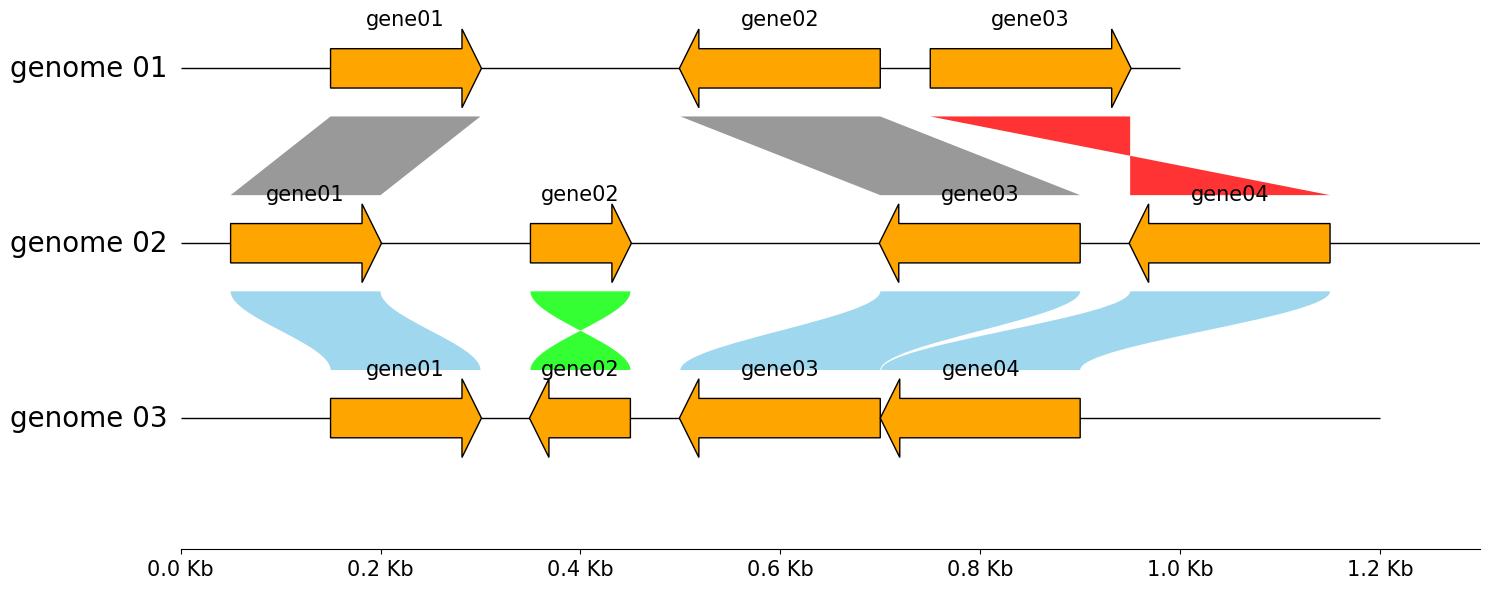

In [2]:
from pygenomeviz import GenomeViz

genome_list = (
    {"name": "genome 01", "size": 1000, "cds_list": ((150, 300, 1), (500, 700, -1), (750, 950, 1))},
    {"name": "genome 02", "size": 1300, "cds_list": ((50, 200, 1), (350, 450, 1), (700, 900, -1), (950, 1150, -1))},
    {"name": "genome 03", "size": 1200, "cds_list": ((150, 300, 1), (350, 450, -1), (500, 700, -1), (701, 900, -1))},
)

gv = GenomeViz(tick_style="axis")
for genome in genome_list:
    name, size, cds_list = genome["name"], genome["size"], genome["cds_list"]
    track = gv.add_feature_track(name, size)
    for idx, cds in enumerate(cds_list, 1):
        start, end, strand = cds
        track.add_feature(start, end, strand, label=f"gene{idx:02d}", linewidth=1, labelrotation=0, labelvpos="top", labelhpos="center", labelha="center")

# Add links between "genome 01" and "genome 02"
gv.add_link(("genome 01", 150, 300), ("genome 02", 50, 200))
gv.add_link(("genome 01", 700, 500), ("genome 02", 900, 700))
gv.add_link(("genome 01", 750, 950), ("genome 02", 1150, 950))
# Add links between "genome 02" and "genome 03"
gv.add_link(("genome 02", 50, 200), ("genome 03", 150, 300), normal_color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 02", 350, 450), ("genome 03", 450, 350), normal_color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 02", 900, 700), ("genome 03", 700, 500), normal_color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 03", 900, 701), ("genome 02", 1150, 950), normal_color="skyblue", inverted_color="lime", curve=True)

gv.savefig("example02.png")

## Example 03

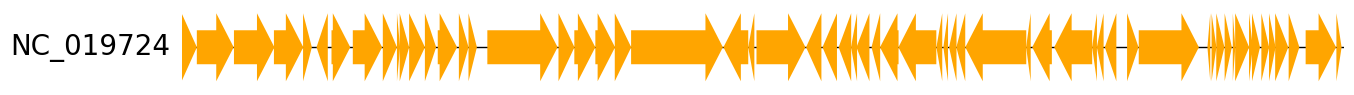

In [3]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gbk_files, _ = load_dataset("enterobacteria_phage")
gbk = Genbank(gbk_files[0])

gv = GenomeViz()
track = gv.add_feature_track(gbk.name, gbk.genome_length)
track.add_genbank_features(gbk)

gv.savefig("example03.png")

## Example 04

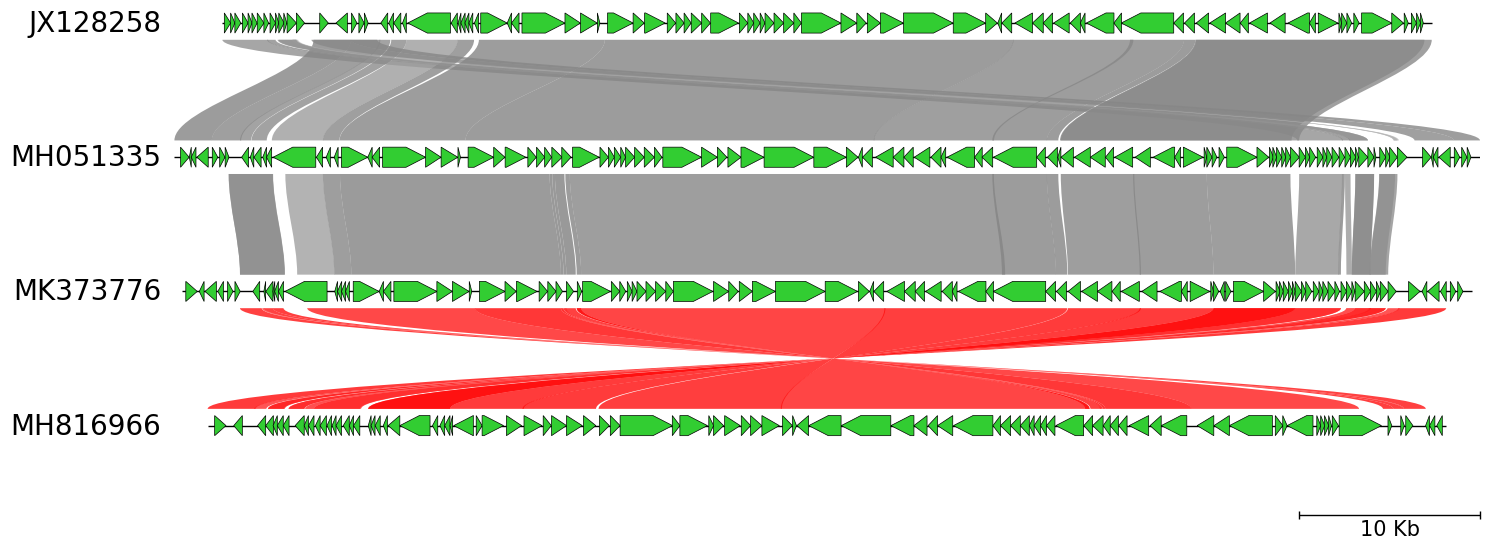

In [4]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_track_height=0.7,
    feature_track_ratio=0.2,
    tick_track_ratio=0.7,
    tick_style="bar",
    align_type="center",
)

gbk_files, links = load_dataset("escherichia_phage")
for gbk_file in gbk_files:
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length)
    track.add_genbank_features(gbk, facecolor="limegreen", linewidth=0.5, arrow_shaft_ratio=1.0)

for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, v=link.identity, curve=True)

gv.savefig("example04.png")

## Example 05

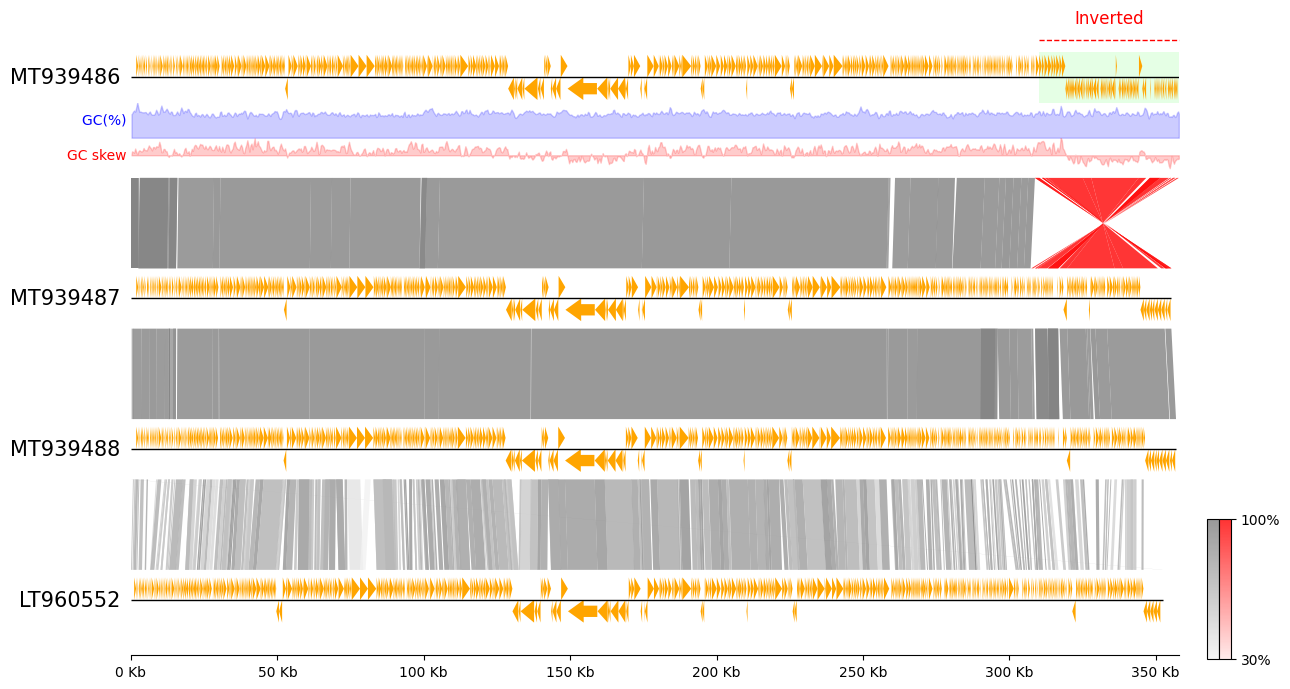

In [5]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_width=12,
    fig_track_height=0.7,
    feature_track_ratio=0.5,
    tick_track_ratio=0.3,
    tick_style="axis",
    tick_labelsize=10,
)

gbk_files, links = load_dataset("erwinia_phage")
gbk_list = [Genbank(gbk_file) for gbk_file in gbk_files]
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.genome_length, labelsize=15)
    track.add_genbank_features(gbk, plotstyle="arrow")

min_identity = int(min(link.identity for link in links))
for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, v=link.identity, vmin=min_identity)

# Add subtracks to top track for plotting 'GC content' & 'GC skew'
gv.add_feature_subtrack(gv.top_track.name, "gc_content", ratio=0.7)
gv.add_feature_subtrack(gv.top_track.name, "gc_skew", ratio=0.7)

fig = gv.plotfig()

# Add label annotation to top track
top_track = gv.top_track  # or, gv.get_track("MT939486") or gv.get_tracks()[0]
label, start, end = "Inverted", 310000 + top_track.offset, 358000 + top_track.offset
center = int((start + end) / 2)
top_track.ax.hlines(1.5, start, end, colors="red", linewidth=1, linestyles="dashed", clip_on=False)
top_track.ax.text(center, 2.0, label, fontsize=12, color="red", ha="center", va="bottom")

# Add fillbox to top track
x, y = (start, start, end, end), (1, -1, -1, 1)
top_track.ax.fill(x, y, fc="lime", linewidth=0, alpha=0.1, zorder=-10)

# Plot GC content for top track
gc_content_ax = gv.top_track.subtracks[0].ax  # or, gv.get_track("gc_content").ax
pos_list, gc_content_list = gbk_list[0].calc_gc_content()
gc_content_ax.set_ylim(bottom=0, top=max(gc_content_list))
pos_list += gv.top_track.offset  # Offset is required if align_type is not 'left'
gc_content_ax.fill_between(pos_list, gc_content_list, alpha=0.2, color="blue")
gc_content_ax.text(gv.top_track.offset, max(gc_content_list) / 2, "GC(%) ", ha="right", va="center", color="blue")

# Plot GC skew for top track
gc_skew_ax = gv.top_track.subtracks[1].ax  # or, gv.get_track("gc_skew").ax
pos_list, gc_skew_list = gbk_list[0].calc_gc_skew()
gc_skew_abs_max = max(abs(gc_skew_list))
gc_skew_ax.set_ylim(bottom=-gc_skew_abs_max, top=gc_skew_abs_max)
pos_list += gv.top_track.offset  # Offset is required if align_type is not 'left'
gc_skew_ax.fill_between(pos_list, gc_skew_list, alpha=0.2, color="red")
gc_skew_ax.text(gv.top_track.offset, 0, "GC skew ", ha="right", va="center", color="red")

# Set coloarbar for link
gv.set_colorbar(fig, vmin=min_identity)

fig.savefig("example05.png", bbox_inches="tight")

## Example 06

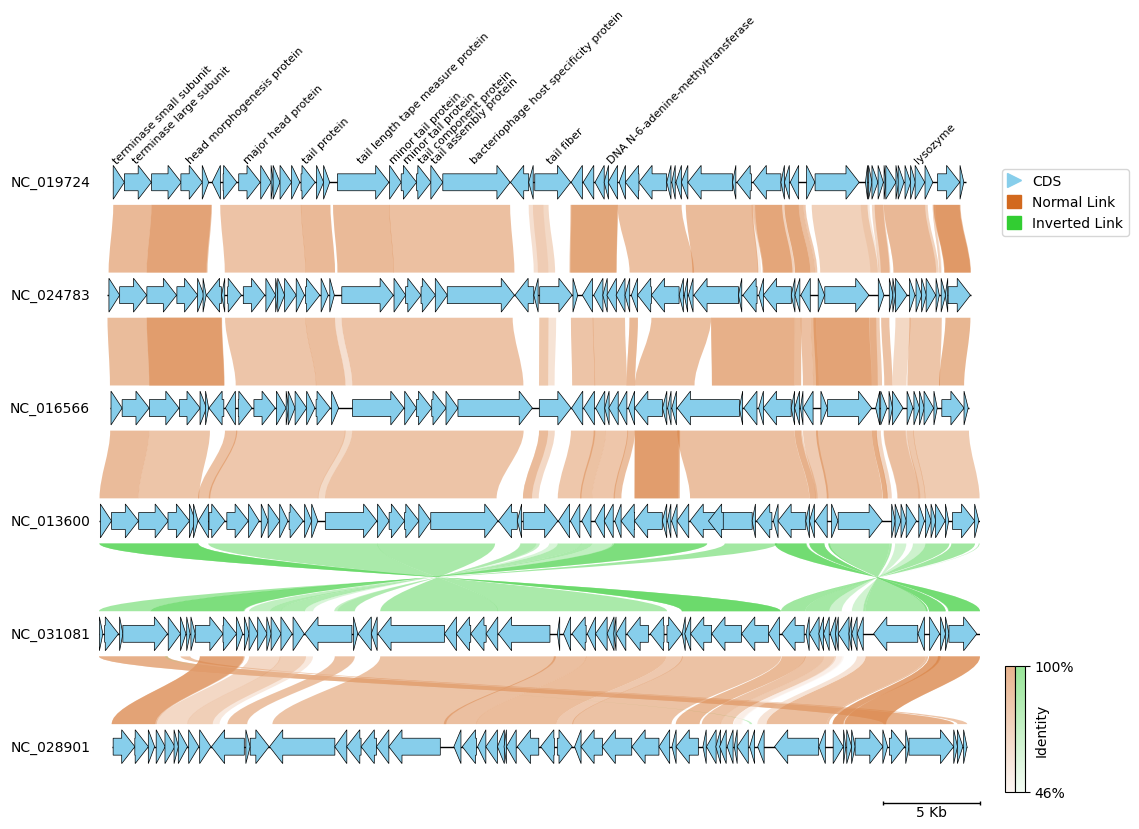

In [6]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_width=10,
    fig_track_height=0.7,
    feature_track_ratio=0.5,
    tick_track_ratio=0.5,
    align_type="center",
    tick_style="bar",
    tick_labelsize=10,
)

gbk_files, links = load_dataset("enterobacteria_phage")
for idx, gbk_file in enumerate(gbk_files):
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length, labelsize=10)
    track.add_genbank_features(
        gbk,
        label_type="product" if idx == 0 else None,  # Labeling only top track
        label_filter=["hypothetical"],  # Ignore 'hypothetical ~~~' label
        labelsize=8,
        labelvpos="top",
        facecolor="skyblue",
        linewidth=0.5,
    )

normal_color, inverted_color, alpha = "chocolate", "limegreen", 0.5
min_identity = int(min(link.identity for link in links))
for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, normal_color, inverted_color, alpha, v=link.identity, vmin=min_identity, curve=True)

fig = gv.plotfig()

# Add Legends (Maybe there is a better way)
handles = [
    Line2D([], [], marker=">", color="skyblue", label="CDS", ms=10, ls="none"),
    Patch(color=normal_color, label="Normal Link"),
    Patch(color=inverted_color, label="Inverted Link"),
]
fig.legend(handles=handles, frameon=True, bbox_to_anchor=(1, 0.8), loc="upper left", ncol=1, handlelength=1, handleheight=1)

# Set colorbar for link
gv.set_colorbar(fig, bar_colors=[normal_color, inverted_color], alpha=alpha, vmin=min_identity, bar_height=0.15, bar_label="Identity", bar_labelsize=10)

fig.savefig("example06.png", bbox_inches="tight")